# 'Lazy' Player for Tic-tac-toe

## Import package

In [1]:
import numpy as np
import itertools
from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math

from datetime import datetime
now = datetime.now()
print("Current Time =", now)

Current Time = 2022-05-25 14:36:05.466453


# Create Game Board (3*3)

In [2]:
def board_coordinate():
  v={}
  coor_option=[-1,0,1]
  vec_set=list(itertools.product(coor_option,coor_option))
  for i in range(9):
    v[i]=np.array(vec_set[i])
  return v

v=board_coordinate()
v

{0: array([-1, -1]),
 1: array([-1,  0]),
 2: array([-1,  1]),
 3: array([ 0, -1]),
 4: array([0, 0]),
 5: array([0, 1]),
 6: array([ 1, -1]),
 7: array([1, 0]),
 8: array([1, 1])}

In [3]:
def v_subset(v,exclude_key):
  v_subset = {key: value for key, value in v.items() if key not in exclude_key}
  return v_subset

### The 'Win' condition: Colinearity for 3 points

![link text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk7-26sc1bZU3L4GcPBfX4qYWgejEaPBHhBg&usqp=CAU)

for Point A, B ,C fall in line

*   |AB|+|BC|==|AC|


In [4]:
# if win, return 1, else return 0
def v_win(v_tri):
  v_tri=list(v_tri.values())
  AB=v_tri[1]-v_tri[0]
  BC=v_tri[2]-v_tri[1]
  AC=v_tri[2]-v_tri[0]
  AB=np.linalg.norm(AB)
  BC=np.linalg.norm(BC)
  AC=np.linalg.norm(AC)
  if AB+BC==AC:
    return 1
  else:
    return 0

In [5]:
def find_all_win_triple(v):
  win_tri_keys=[]
  # select 3 from v (based on key)
  select_3_from_9=list(combinations(v.keys(),3))
  for key_triple in select_3_from_9:
    key_triple=list(key_triple)
    v_tri= {key: value for key, value in v.items() if key in key_triple}
    result=v_win(v_tri)
    if result == 1:
      win_tri_keys.append(key_triple)
      # print(key_triple)
  return win_tri_keys

win_triple_key=find_all_win_triple(v)
win_triple_key

[[0, 1, 2],
 [0, 3, 6],
 [0, 4, 8],
 [1, 4, 7],
 [2, 4, 6],
 [2, 5, 8],
 [3, 4, 5],
 [6, 7, 8]]

# The 'lazy' algorithm --- how action is taken based on current situation

Intuition of 'Lazy': 


*  Only take move with consideration when is necessary
  * 'necessary' = opponent is 1 step to win
*  If not, random move



In [6]:
# action based on looking at what we have and what the oponent have
## input: a, b vector key stored in that step
# action will return the vector key (e.g., 0 to 8)
def action(a_vec_key,b_vec_key):
  full_vec_keys=[i for i in range(9)]
  action_range=list(set(full_vec_keys)-set(a_vec_key)-set(b_vec_key))
  # intialize the action
  action=999

  # see if one already win
  for a_triple in list(combinations(a_vec_key,3)):
    a_triple=list(a_triple)
    if a_triple in win_triple_key:
      action='a win'
      return action
  for b_triple in list(combinations(b_vec_key,3)):
    b_triple=list(b_triple)
    if b_triple in win_triple_key:
      action='b win'
      return action

  # if b_vec_keys less than 2 keys
  if len(b_vec_key)<2:
    pass
  else:
    # investigate each b_pair
    for b_pair in list(combinations(b_vec_key,2)):
      b_pair=list(b_pair)
      # investigate each win_triple, if overlap == 2, action is required
      for tri_key in win_triple_key:
        overlap=list(set(b_pair) & set(tri_key))
        if len(overlap)==2:
          action_suggest=list(set(tri_key)-set(b_pair))[0]
          # if action_suggest is not hold
          if action_suggest not in a_vec_key:
            action=action_suggest
        else:
          pass
  return action

In [7]:
# test the action function 
a_vec_key=[3,0,8]
b_vec_key=[1,6,4]

action(a_vec_key,
       b_vec_key)

2

# Two Player (a and b) 

*   a Go first  --- Step: 1,3,5,7,9 (odd)
*   b Go second --- Step: 2,4,6,8 (even)

 -- step stored as key in dict


## Illustration for two player 'a' and 'b'

*   a -  'Lazy' algorihm Player
*   b -  Random Player





## Single Game Simulation

In [8]:
def single_game():
  # value to store the result (1=a win, 0= draw, -1= b win, default is 999)
  game_result=999

  # create dictionary to store vector (key) retrived for each player
  full_vec_keys=[i for i in range(9)]
  a_vec_key=[]
  b_vec_key=[]
  vec_keys_left=list(set(full_vec_keys) -set(a_vec_key)-set(b_vec_key))
  # intialize the step_record
  step_record={}
  for step in range(9):
    step_record[step+1]='null'
  step_record

  # for each step
  for step in step_record.keys():
    vec_keys_left=list(set(full_vec_keys) -set(a_vec_key)-set(b_vec_key))
    ## odd step = player 'a' action
    if step % 2 == 1:
      a_key=action(a_vec_key,b_vec_key)
      # if not necessary move, conduct a random move
      if a_key==999:
        a_key=random.choice(vec_keys_left)
      a_vec_key.append(a_key)
      step_record[step]=a_key
      # check if already win
      a_result=action(a_vec_key,b_vec_key)
      if a_result=='a win':
        game_result=1
        break

    ## even step = player 'b' move
    elif step % 2==0:
      b_key=random.choice(vec_keys_left)
      b_vec_key.append(b_key)
      step_record[step]=b_key
      b_result=action(a_vec_key,b_vec_key)
      # check if already win
      if b_result=='b win':
        game_result=-1
        break
    
    if step == 9:
      game_result=0
      break
  # store the record for both player
  a_record=a_vec_key
  b_record=b_vec_key
  return game_result,a_record,b_record

## Simulate multiple games (e.g. 1000 times)

In [9]:
# run the game 'iterations' times
def simulate_game(iterations):
  result_list=[]
  for i in range(iterations):
    game_result,a_record,b_record=single_game()
    if game_result==-1:
      print('(b) Random Player wins')
      print(f'a = {a_record}')
      print(f'b = {b_record}')
      pass
    result_list.append(game_result)
  # display the result
  b_win=result_list.count(-1)
  draw=result_list.count(0)
  a_win=result_list.count(1)
  no_lose_rate=(iterations-b_win)/(iterations)
  sns.barplot(x=[b_win,draw,a_win],y=['b_win','draw','a_win'])
  print('')
  print(f'Result run on {iterations} simulations')
  print('----------------------')
  print(f'- (b) Random player win = {b_win}')
  print(f'- Draw = {draw}')
  print(f'- (a) Algorithm win = {a_win}')
  print(f'- The No Lose Rate = {no_lose_rate}')
  return result_list

(b) Random Player wins
a = [6, 2, 3, 7]
b = [0, 1, 4, 8]
(b) Random Player wins
a = [1, 7, 0, 2]
b = [3, 6, 4, 5]
(b) Random Player wins
a = [8, 3, 0, 7]
b = [2, 1, 4, 6]
(b) Random Player wins
a = [2, 6, 5, 0]
b = [1, 8, 4, 7]
(b) Random Player wins
a = [6, 3, 2, 8]
b = [1, 0, 4, 7]

Result run on 500 simulations
----------------------
- (b) Random player win = 5
- Draw = 400
- (a) Algorithm win = 95
- The No Lose Rate = 0.99


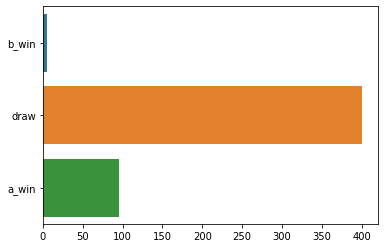

In [10]:
simulate_result=simulate_game(iterations=500)

# Findings



*   by just using the 'lazy' method, you can not ensure undefeated
*   'lazy' method = 
  * 'stop win' action = take the action when your opponent is 1 step away from win
  * lazy = take random choice if 'stop win' is not required

* However, the 'lazy' algorithm are still significantly better than a random player
  * 'lazy' player win rate =  30 * random player win rate


# Look into a b(Random Player) Win case

In [11]:
def visualize_game_result(a_vec_key,b_vec_key):
  print('- Red block = player a --- label 1' )
  print('- Orange block = player b --- label 2')
  print('- Black block = empty --- label 0')
  a=a_vec_key
  b=b_vec_key
  data=[[0,0,0],
        [0,0,0],
        [0,0,0]]
  # rewrite the result
  for element in a:
    row_index=math.trunc((element)/3)
    col_index=element%3
    data[row_index][col_index]=1
  for element in b:
    row_index=math.trunc((element)/3)
    col_index=element%3
    data[row_index][col_index]=2
  # plot
  fig, ax =plt.subplots(1,1,figsize=(3.5,3),constrained_layout=True)
  sns.heatmap(data,annot=True,cbar=False)

- Red block = player a --- label 1
- Orange block = player b --- label 2
- Black block = empty --- label 0


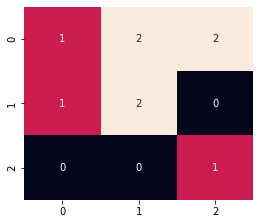

In [12]:
visualize_game_result(a_vec_key=[8, 3, 0],
                      b_vec_key=[2, 1, 4])